# Life Expectancy and GPD analysis Project

## Project Scope

### Goals

#### Time Series Visualization:
- Track the evolution of life expectancy at birth over the years for each country.
- Chart GDP trends over time for each country.
- Create comprehensive plots showcasing trends for all countries simultaneously.

#### Correlation Exploration
- Analyze how GDP and life expectancy are correlated, including potential shifts or trends across different time periods.

#### Comparative Analysis:
- Identify the countries with the highest and lowest GDP in each year.
- Identify the countries with the highest and lowest life expectancy in each year.
  
### Data
- **Country**: Nominal variable representing each country.
- **Year**: Discrete variable denoting the time period.
- **Life expectancy at birth**: Continuous variable representing the average number of years a newborn is expected to live.
- **GDP**: Continuous variable representing the economic output.

### Analysis
#### 1. Data Cleaning & Preprocessing
- **Data Integrity:** Examine the dataset for missing values, inconsistencies, or outliers.
- **Standardization:** Ensure that country names and year formats are consistent.
- **Transformation:** Prepare the data for time series analysis by handling any irregularities.

#### 2. Exploratory Data Analysis (EDA)
- **Descriptive Statistics:** Generate summary statistics (mean, median, standard deviation) for life expectancy and GDP.
- **Trend Analysis:**
    - Plot time series for life expectancy and GDP for each country individually.
    - Develop aggregate visualizations for overall trends across all countries.
- **Correlation Assessment:**
    - Use scatter plots and compute correlation coefficients to explore the relationship between GDP and life expectancy.
    - Identify any potential lag effects between the variables over time.

#### 3. Advanced Visualizations & Comparative Analysis
- **Interactive Dashboards:** Create dynamic visualizations (e.g., interactive line charts, scatter plots) to enable deeper exploration.
- **Highlight Extremes**:
    - Develop visual markers to easily identify countries with the highest and lowest GDP and life expectancy each year.
    - Consider using bubble charts or heat maps for a more intuitive presentation.

#### 4. Statistical Analysis
- **Regression Models:**
    - Implement regression analysis to quantify the relationship between GDP and life expectancy.
    - Explore models that account for time trends and potential confounding variables.
- **Segmentation:**
    - Analyze trends by grouping countries based on regions or income levels to uncover hidden patterns.
 
#### 5. Interpretation & Reporting
- **Insight Generation:** Summarize key findings, emphasizing trends, correlations, and outliers.
- **Contextual Analysis:** Discuss how economic performance and public health indicators interplay and what that might mean for policy and future research.
- **Documentation:** Record all analytical steps, challenges, and decisions to ensure reproducibility and clarity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import plotly.express as px
import plotly.io as pio

%matplotlib inline

sns.set(style='whitegrid', palette='pastel', context='talk')

#####################################################################################################################################################################################
###############################################     1. Data Cleaning and Pre-processing    ##########################################################################################
#####################################################################################################################################################################################

data = pd.read_csv('all_data.csv')
data.head()

Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

In [1]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [2]:
null_counts = data.isnull().sum()
print(null_counts)

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


In [3]:
data.rename(columns={
    'Life expectancy at birth (years)': 'Life_expectancy'
    }, inplace=True)
data.columns

Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')

In [4]:
# No cleaning needed
#####################################################################################################################################################################################
###############################################     2. Exploratory Data Analysis     #####3##########################################################################################
#####################################################################################################################################################################################
data.describe(include='all')

Country         Year  Life_expectancy           GDP
count       96    96.000000        96.000000  9.600000e+01
unique       6          NaN              NaN           NaN
top      Chile          NaN              NaN           NaN
freq        16          NaN              NaN           NaN
mean       NaN  2007.500000        72.789583  3.880499e+12
std        NaN     4.633971        10.672882  5.197561e+12
min        NaN  2000.000000        44.300000  4.415703e+09
25%        NaN  2003.750000        74.475000  1.733018e+11
50%        NaN  2007.500000        76.750000  1.280220e+12
75%        NaN  2011.250000        78.900000  4.067510e+12
max        NaN  2015.000000        81.000000  1.810000e+13

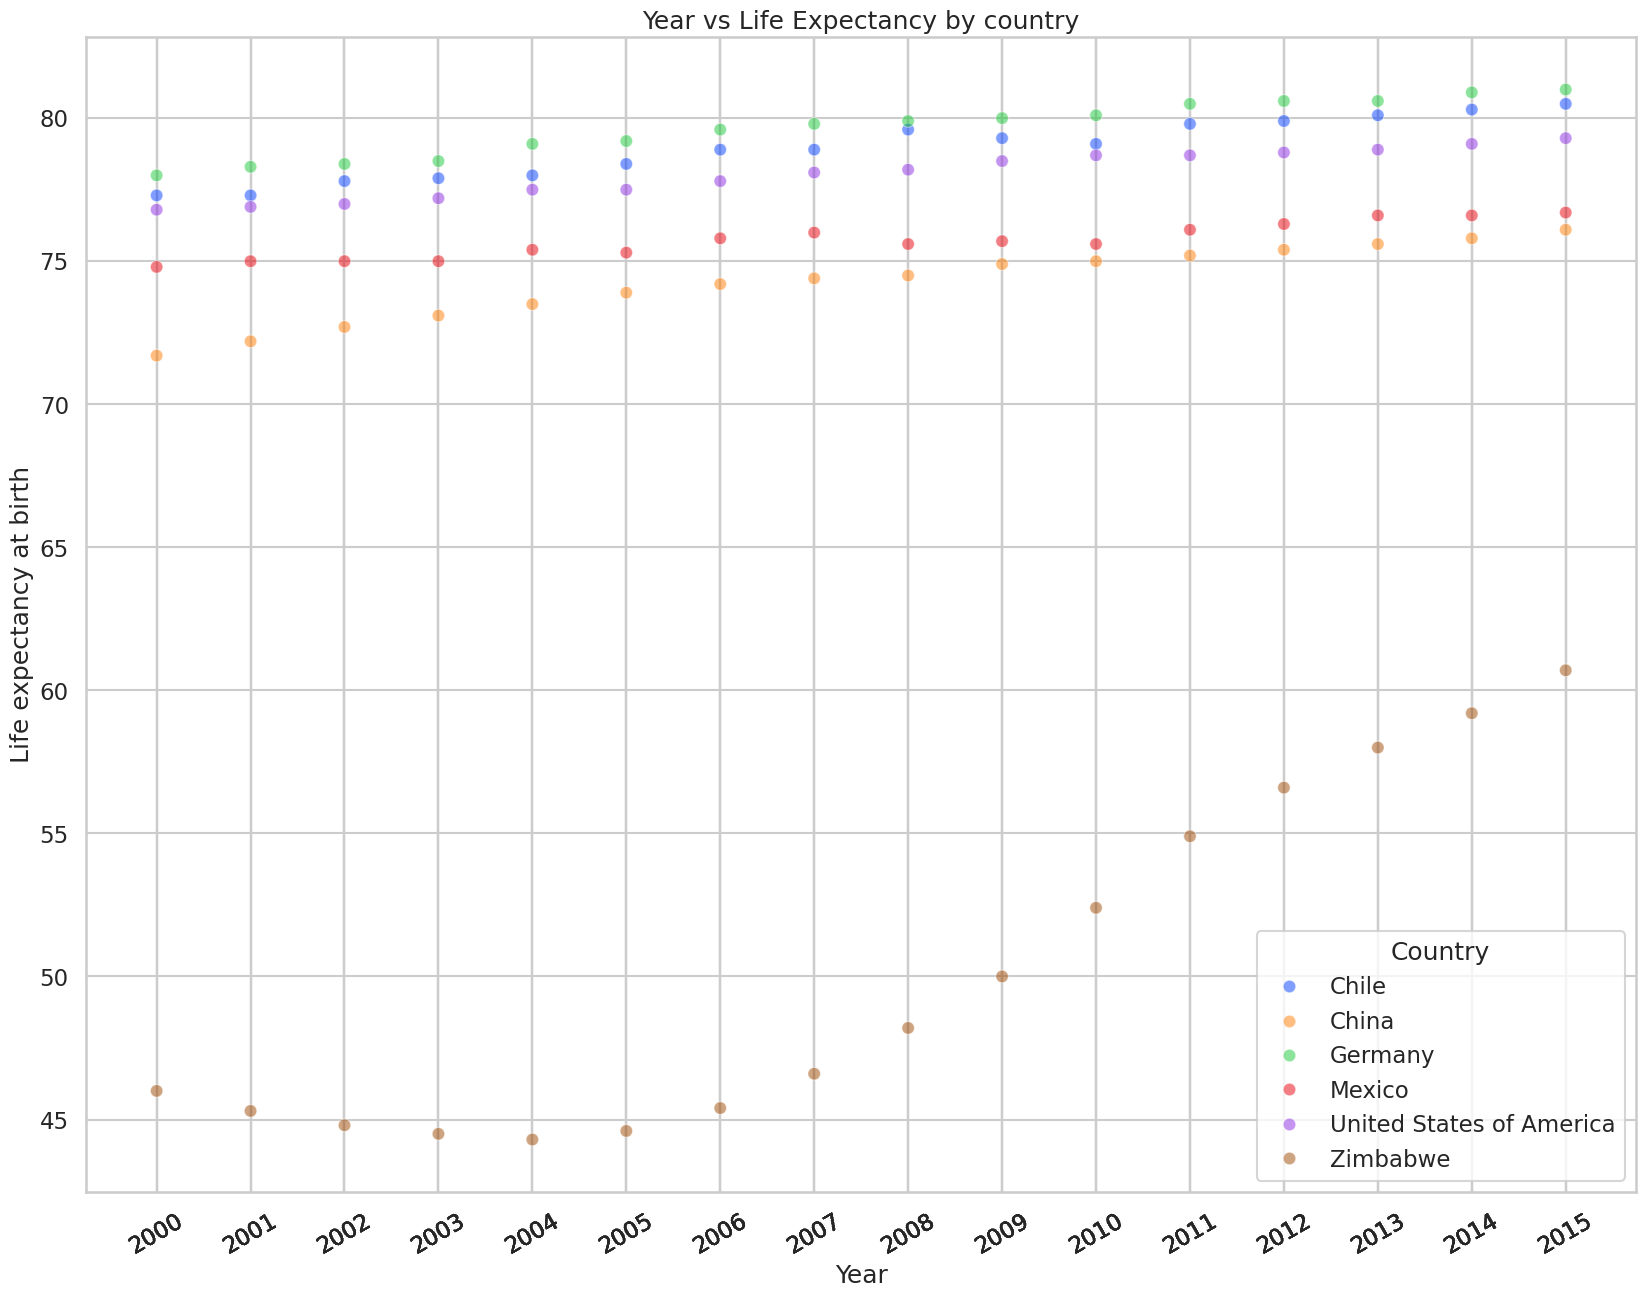

In [5]:
# Plot time series for life expectancy and GDP for each country individually.
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Year', y='Life_expectancy', data=data, hue='Country', palette='bright', alpha=.5)
plt.xlabel('Year')
plt.xticks(data.Year, rotation=30)
plt.ylabel('Life expectancy at birth')
plt.title('Year vs Life Expectancy by country')
plt.show()
plt.close()

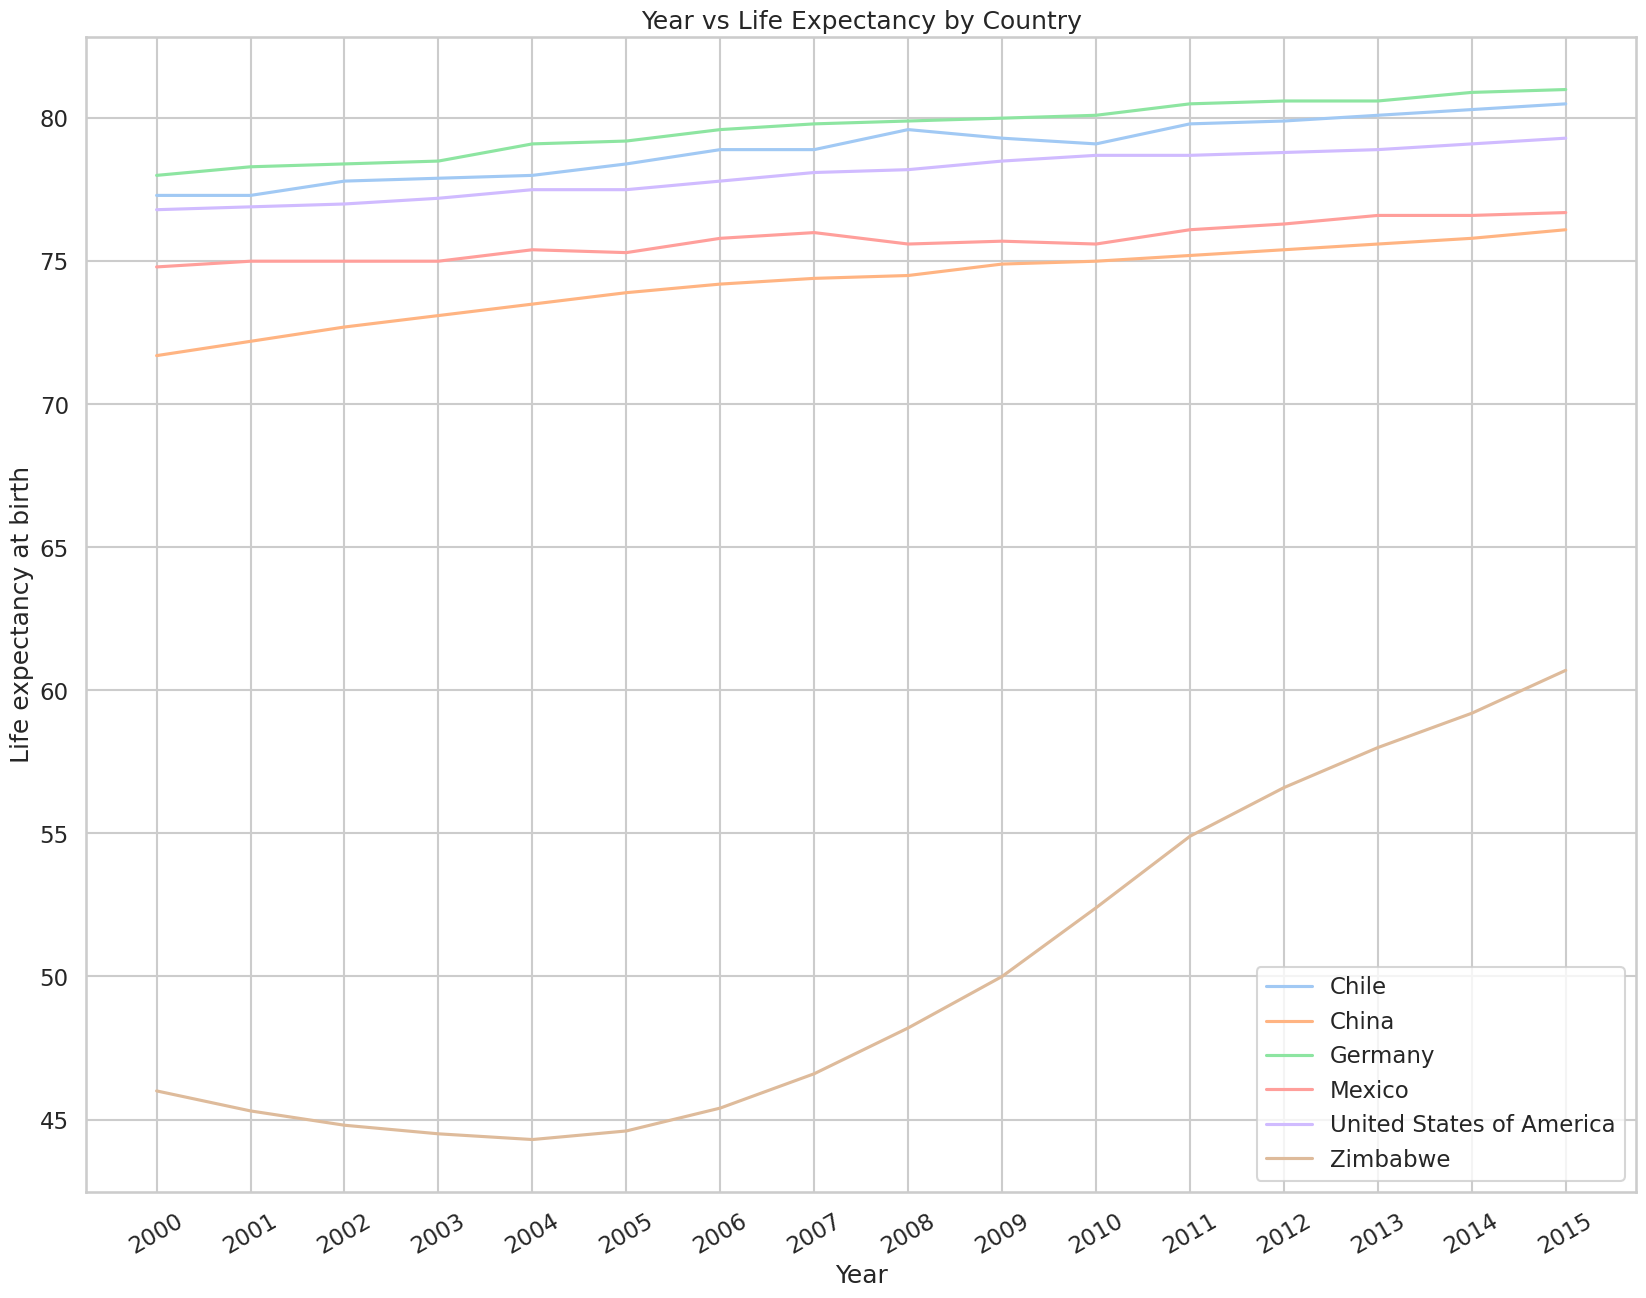

In [6]:
plt.figure(figsize=(20, 15))

# Adicionando cores diferentes para cada país
for country in data.Country.unique():
    country_data = data[data["Country"] == country]
    plt.plot(country_data["Year"], country_data["Life_expectancy"], label=country)

plt.xlabel("Year")
plt.xticks(data.Year.unique(), rotation=30)
plt.ylabel("Life expectancy at birth")
plt.title("Year vs Life Expectancy by Country")
plt.legend()  # Exibir legenda para identificação das curvas
plt.show()
plt.close()

Analyzing the graphics above, we can observe a growth trend in the life expectancy at birth over the years. Nonetheless, there is a huge difference in the life expectancy between the developed or emergent countries and Zimbabue, but this gap is being reduced in the more recent years.

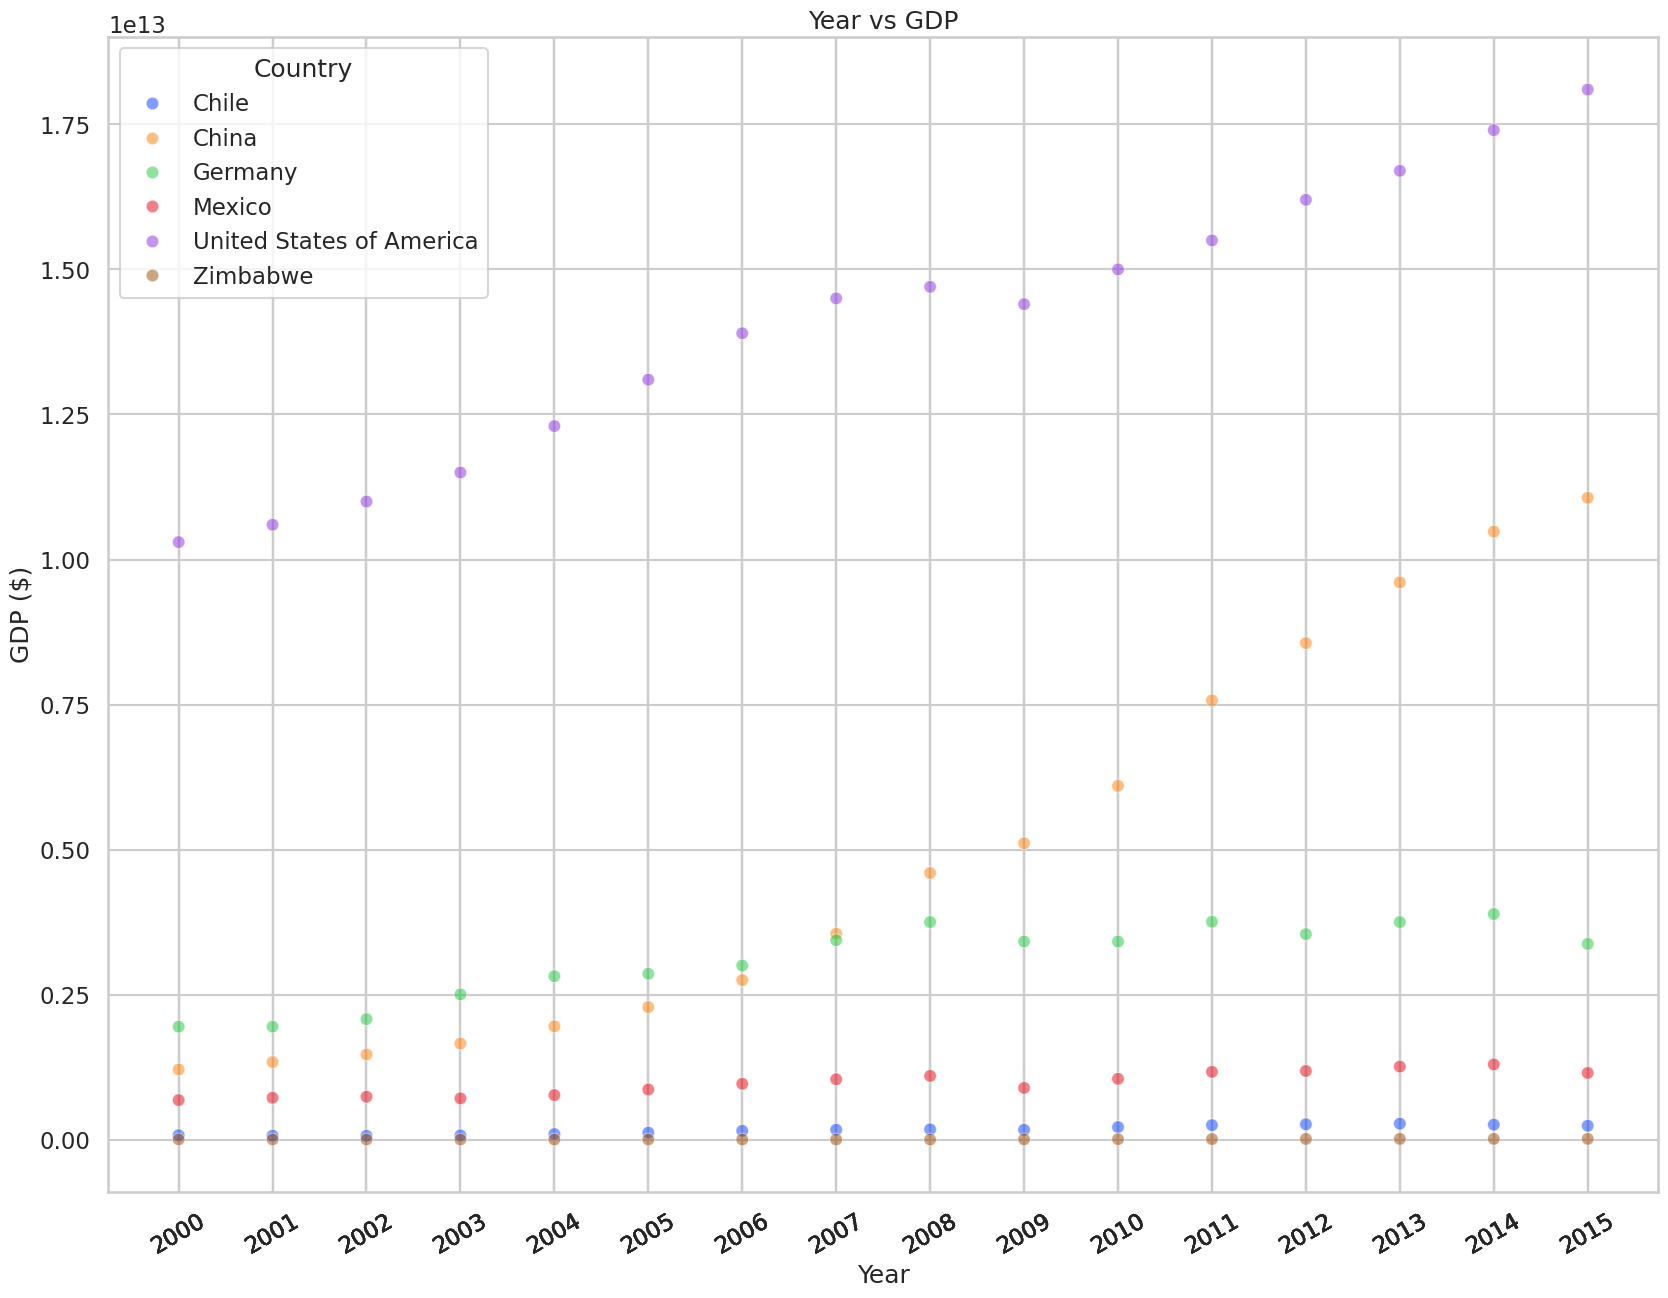

In [10]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Year', y='GDP', data=data, hue='Country', palette='bright', alpha=.5)
plt.xlabel('Year')
plt.xticks(data.Year, rotation=30)
plt.ylabel('GDP ($)')
plt.title('Year vs GDP')
plt.show()
plt.close()

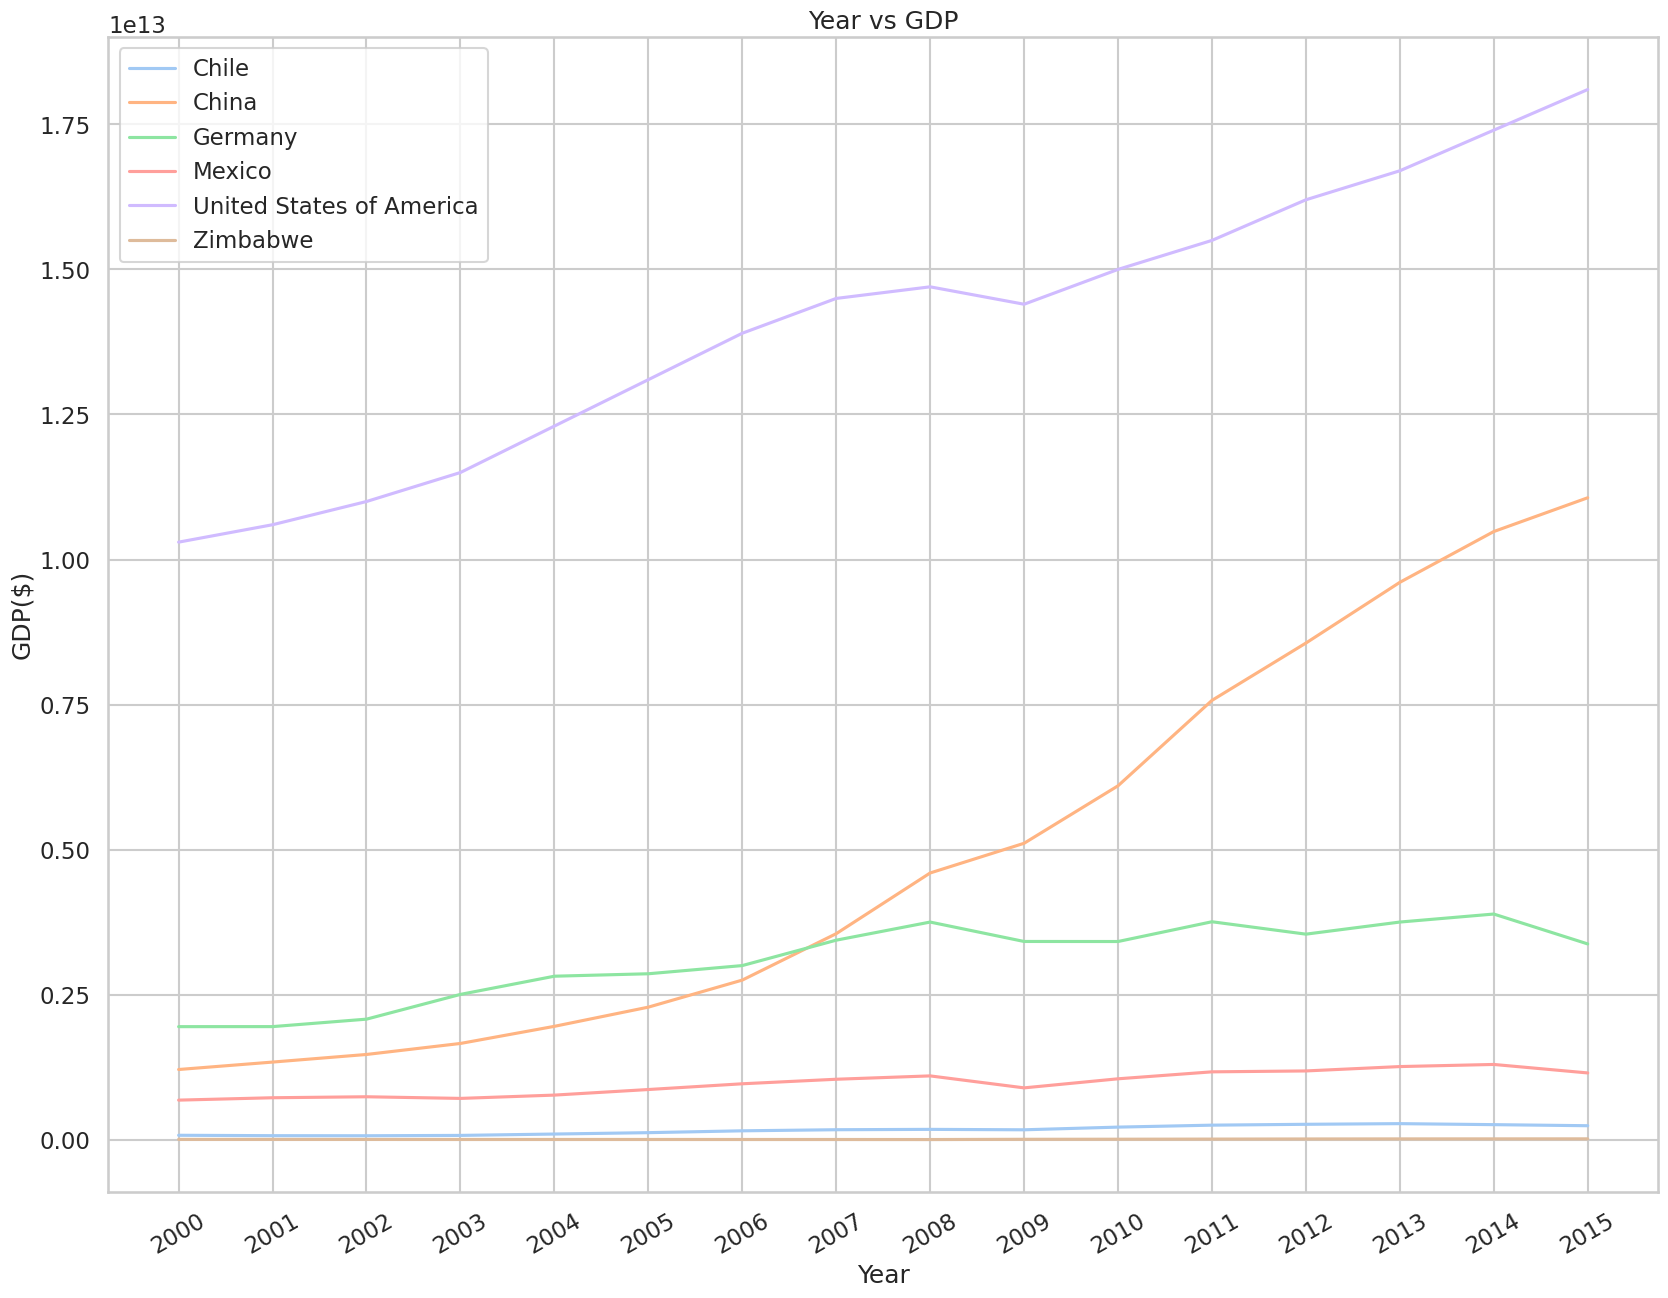

In [11]:
plt.figure(figsize=(20, 15))

for country in data.Country.unique():
    country_data = data[data["Country"] == country]
    plt.plot(country_data["Year"], country_data["GDP"], label=country)

plt.xlabel("Year")
plt.xticks(data.Year.unique(), rotation=30)
plt.ylabel("GDP($)")
plt.title("Year vs GDP")
plt.legend() 
plt.show()
plt.close()

Now, for the GDP, there is also a growing trend. With a large gap between the US and other countries, but this is being minimized by the sharp GDP growth of China. While the China and the US have a rapid growth, the rest of the countries have a more moderate country. Zimbabwe have the lowest GDP.

In [12]:
# Develop aggregate visualizations for overall trends across all countries.
mean_life_expectancy_by_year = data.groupby('Year').Life_expectancy.mean()
mean_life_expectancy_by_year

Year
2000    70.766667
2001    70.833333
2002    70.950000
2003    71.033333
2004    71.300000
2005    71.483333
2006    71.950000
2007    72.300000
2008    72.666667
2009    73.066667
2010    73.483333
2011    74.200000
2012    74.600000
2013    74.966667
2014    75.316667
2015    75.716667
Name: Life_expectancy, dtype: float64

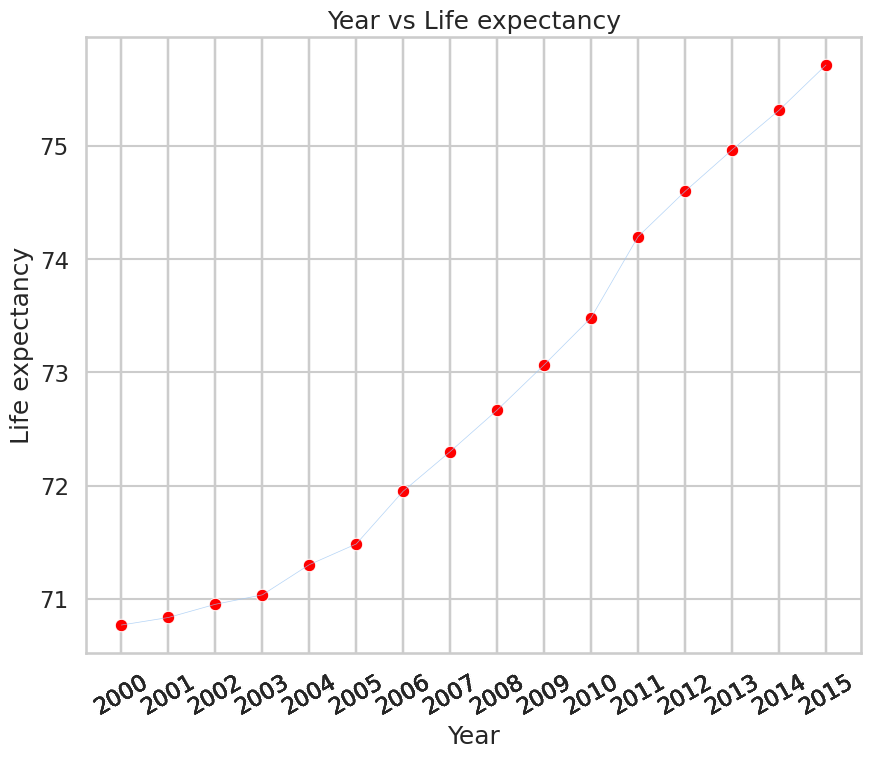

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=mean_life_expectancy_by_year.index, y=mean_life_expectancy_by_year, color='red')
plt.plot(mean_life_expectancy_by_year.index, mean_life_expectancy_by_year, linewidth=.5, alpha=.8)
plt.xlabel('Year')
plt.xticks(data.Year, rotation=30)
plt.ylabel('Life expectancy')
plt.title('Year vs Life expectancy')
plt.show()
plt.close()

In [21]:
mean_gdp_by_year = data.groupby('Year').GDP.mean()
mean_gdp_by_year

Year
2000    2.371583e+12
2001    2.448752e+12
2002    2.561221e+12
2003    2.743446e+12
2004    2.991647e+12
2005    3.207074e+12
2006    3.463349e+12
2007    3.785750e+12
2008    4.055986e+12
2009    4.000653e+12
2010    4.299587e+12
2011    4.710965e+12
2012    4.962082e+12
2013    5.269258e+12
2014    5.558059e+12
2015    5.658565e+12
Name: GDP, dtype: float64

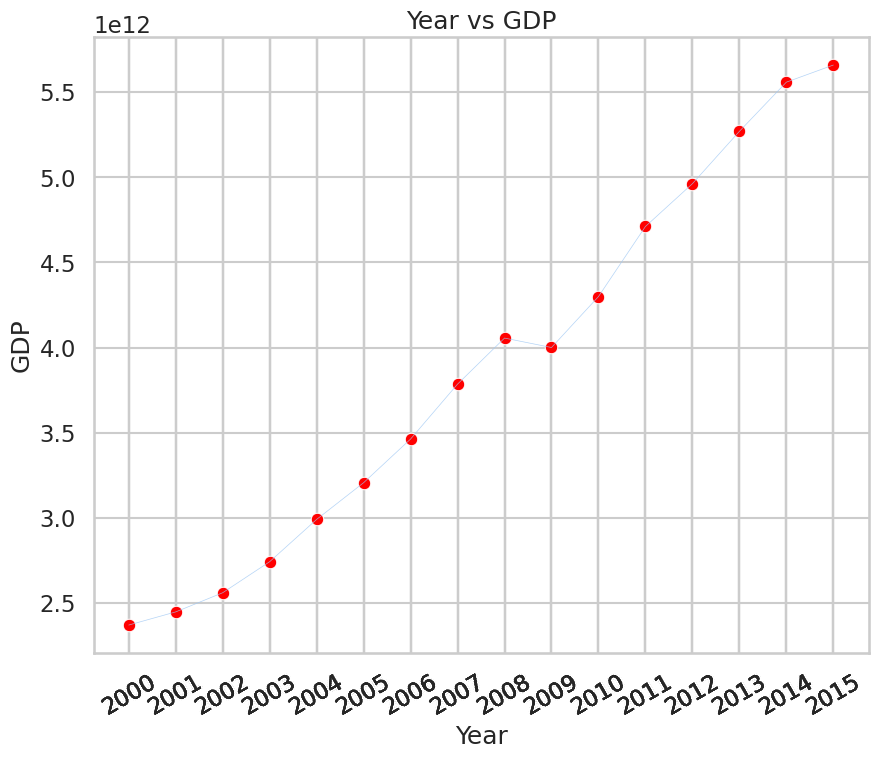

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=mean_gdp_by_year.index, y=mean_gdp_by_year, color='red')
plt.plot(mean_gdp_by_year.index, mean_gdp_by_year, linewidth=.5, alpha=.8)
plt.xlabel('Year')
plt.xticks(data.Year, rotation=30)
plt.ylabel('GDP')
plt.title('Year vs GDP')
plt.show()
plt.close()

By the observation of the two overall graphics above, we can confirm the growth trend both in GDP and life expectancy at birth.

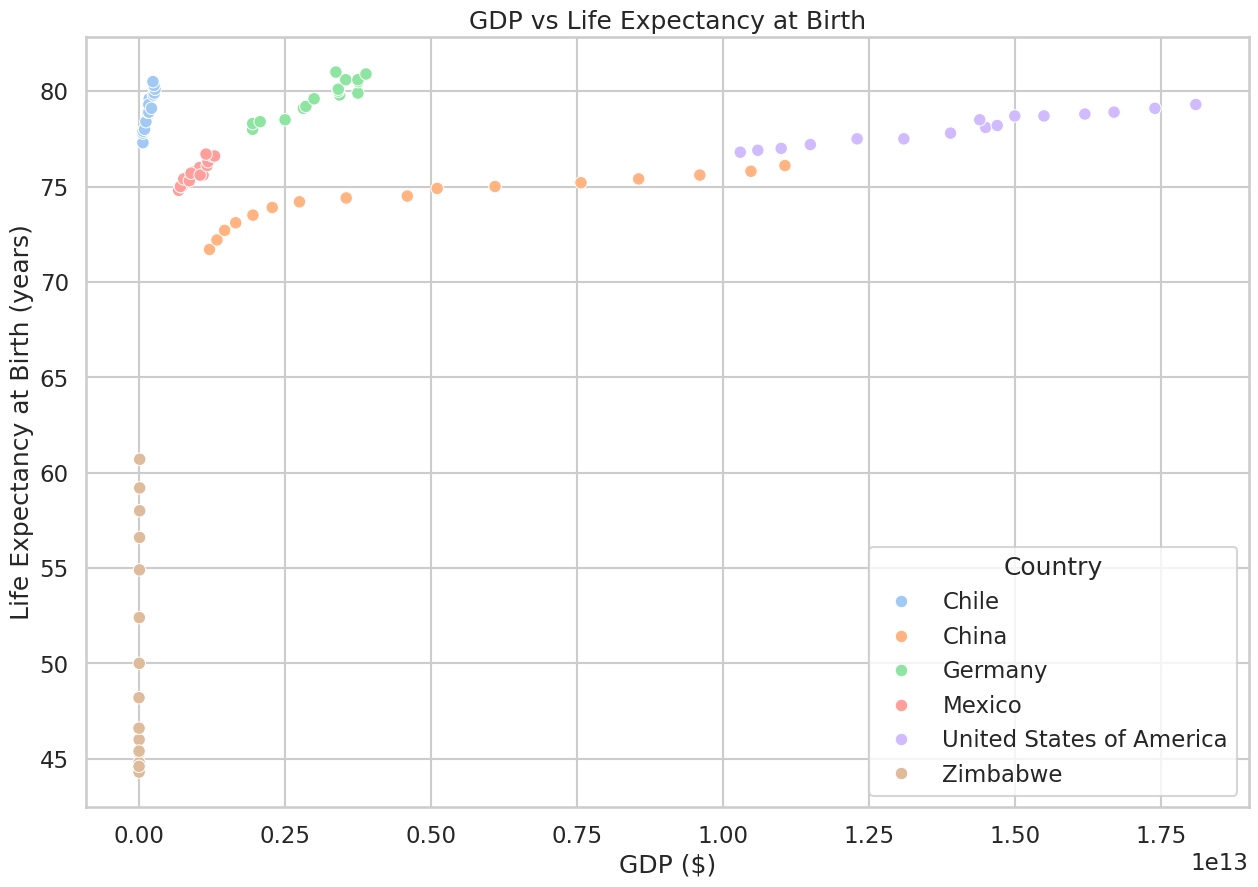

In [24]:
# Use scatter plots and compute correlation coefficients to explore the relationship between GDP and life expectancy.
plt.figure(figsize=(15, 10))
sns.scatterplot(x='GDP', y='Life_expectancy', hue='Country', data=data)
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.title('GDP vs Life Expectancy at Birth')
plt.show()
plt.close()

In [31]:
for country in data.Country.unique():
    data_country = data[data.Country == country]
    corr,_ = pearsonr(data_country.GDP, data_country.Life_expectancy)
    print(f'Correlation coefficient for {country} is {corr:.2f}')

Correlation coefficient for Chile is 0.95
Correlation coefficient for China is 0.91
Correlation coefficient for Germany is 0.93
Correlation coefficient for Mexico is 0.93
Correlation coefficient for United States of America is 0.98
Correlation coefficient for Zimbabwe is 0.97


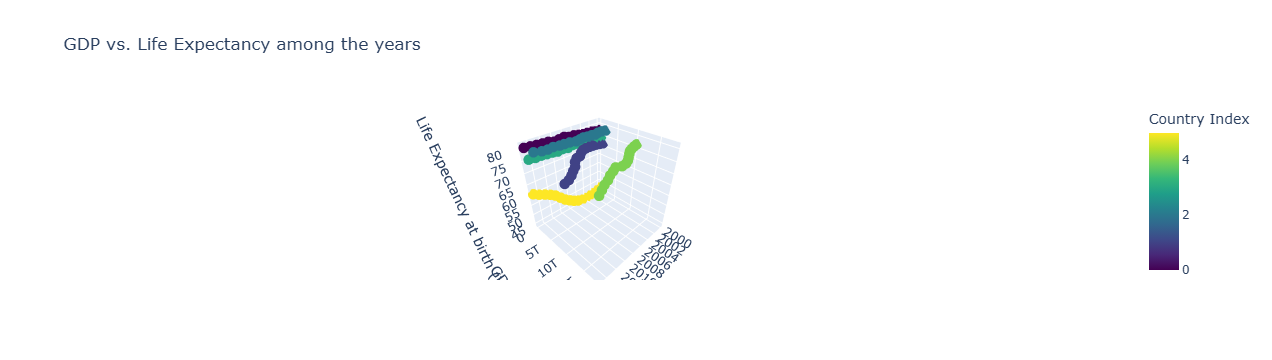

In [33]:
#####################################################################################################################################################################################
###############################################     3. Advanced Visualizations & Comparative Analysis    ############################################################################
#####################################################################################################################################################################################
import plotly.graph_objects as go

# Assign a unique numeric color to each country
country_colors = {country: idx for idx, country in enumerate(data["Country"].unique())}
data["Color"] = data["Country"].map(country_colors)  # Convert country names to numeric values

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data['Year'],
    y=data['GDP'],
    z=data['Life_expectancy'],
    mode='markers',
    marker=dict(size=6, color=data['Color'], colorscale='Viridis', colorbar=dict(title="Country Index"))
)])

# Set layout
fig.update_layout(
    title="GDP vs. Life Expectancy among the years",
    scene=dict(xaxis_title='Year', yaxis_title='GDP ($)', zaxis_title='Life Expectancy at birth (Years)')
)

# Show plot
fig.show()


In [66]:

# Enable Plotly in Jupyter Notebook
pio.renderers.default = "plotly_mimetype"
max_data = data.groupby('Year').Life_expectancy.max()
min_data = data.groupby('Year').Life_expectancy.min()
mean_data = data.groupby('Year').Life_expectancy.mean()

Year
2000    70.766667
2001    70.833333
2002    70.950000
2003    71.033333
2004    71.300000
2005    71.483333
2006    71.950000
2007    72.300000
2008    72.666667
2009    73.066667
2010    73.483333
2011    74.200000
2012    74.600000
2013    74.966667
2014    75.316667
2015    75.716667
Name: Life_expectancy, dtype: float64


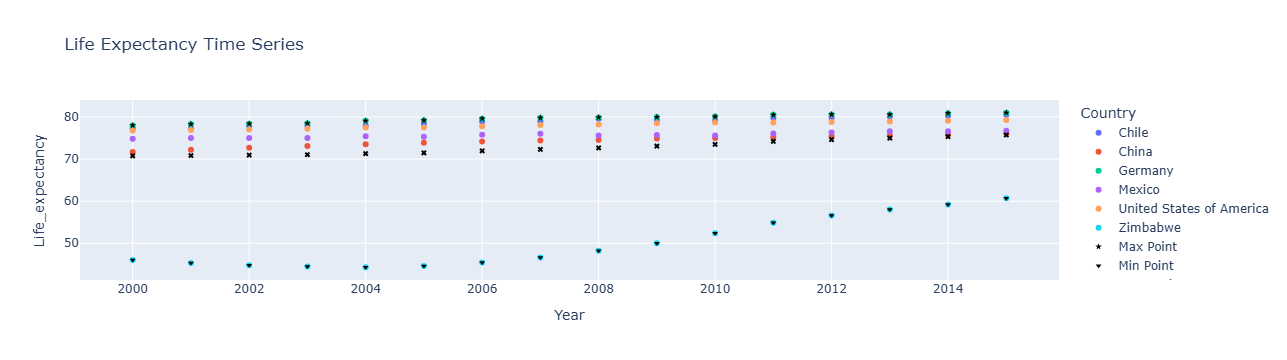

In [67]:
fig_scatter = px.scatter(data, x='Year', y='Life_expectancy', color='Country', title="Life Expectancy Time Series")

# Add max markers (only first one shows in legend)
first = True
for year, exp in zip(max_data.index, max_data):
    fig_scatter.add_trace(go.Scatter(
        x=[year], y=[exp],
        mode='markers',
        marker=dict(color='black', size=5, symbol='star'),
        name="Max Point" if first else None,
        legendgroup="max",  # Groups all max markers under one legend item
        showlegend=first  # Only show legend for the first item
    ))
    first = False  # Disable legend for the rest

# Add min markers (only first one shows in legend)
first = True
for year, exp in zip(min_data.index, min_data):
    fig_scatter.add_trace(go.Scatter(
        x=[year], y=[exp],
        mode='markers',
        marker=dict(color='black', size=5, symbol='triangle-down'),
        name="Min Point" if first else None,
        legendgroup="min",  # Groups all min markers under one legend item
        showlegend=first  # Only show legend for the first item
    ))
    first = False  # Disable legend for the rest

# Add mean markers (only first one shows in legend)
first = True  # Reset for mean points
for year, exp in zip(mean_data.index, mean_data):
    fig_scatter.add_trace(go.Scatter(
        x=[year], y=[exp],
        mode='markers',
        marker=dict(color='black', size=5, symbol='x'),
        name="Mean Point" if first else None,
        legendgroup="mean",
        showlegend=first
    ))
    first = False

fig_scatter.show()


In [69]:
max_data = data.groupby('Year').GDP.max()
min_data = data.groupby('Year').GDP.min()
mean_data = data.groupby('Year').GDP.mean()

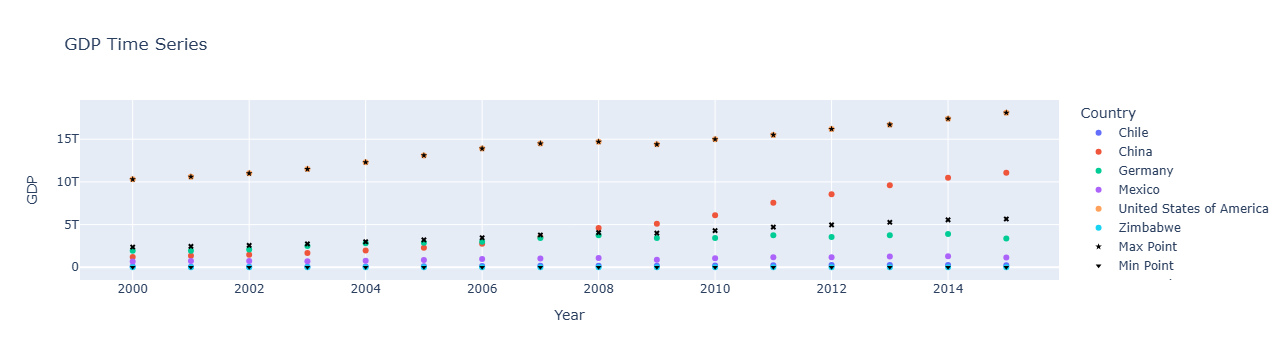

In [70]:

# Enable Plotly in Jupyter Notebook
fig_scatter = px.scatter(data, x='Year', y='GDP', color='Country', title="GDP Time Series")

# Add max markers (only first one shows in legend)
first = True
for year, gdp in zip(max_data.index, max_data):
    fig_scatter.add_trace(go.Scatter(
        x=[year], y=[gdp],
        mode='markers',
        marker=dict(color='black', size=5, symbol='star'),
        name="Max Point" if first else None,
        legendgroup="max",  # Groups all max markers under one legend item
        showlegend=first  # Only show legend for the first item
    ))
    first = False  # Disable legend for the rest

# Add min markers (only first one shows in legend)
first = True
for year, gdp in zip(min_data.index, min_data):
    fig_scatter.add_trace(go.Scatter(
        x=[year], y=[gdp],
        mode='markers',
        marker=dict(color='black', size=5, symbol='triangle-down'),
        name="Min Point" if first else None,
        legendgroup="min",  # Groups all min markers under one legend item
        showlegend=first  # Only show legend for the first item
    ))
    first = False  # Disable legend for the rest

# Add mean markers (only first one shows in legend)
first = True
for year, gdp in zip(mean_data.index, mean_data):
    fig_scatter.add_trace(go.Scatter(
        x=[year], y=[gdp],
        mode='markers',
        marker=dict(color='black', size=5, symbol='x'),
        name="Mean Point" if first else None,
        legendgroup="mean",  # Groups all min markers under one legend item
        showlegend=first  # Only show legend for the first item
    ))
    first = False  # Disable legend for the rest
    
fig_scatter.show()

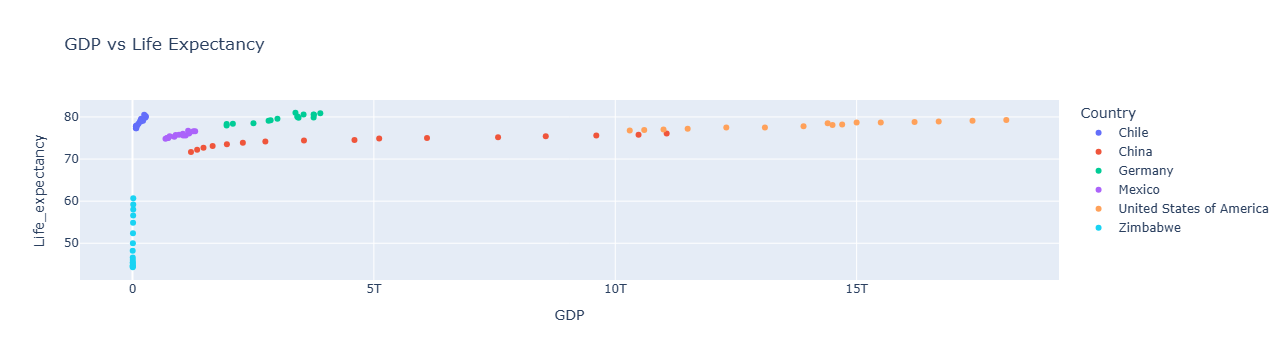

In [38]:

# Enable Plotly in Jupyter Notebook
fig_scatter = px.scatter(data, x='GDP', y='Life_expectancy', color='Country', title="GDP vs Life Expectancy")
fig_scatter.show()

In [28]:
models = []

for country in data.Country.unique():
    data_country = data[data.Country == country]
    model = sm.OLS.from_formula('Life_expectancy ~ GDP', data=data_country).fit()
    print(model.params)
    models.append(model)

Intercept    7.672234e+01
GDP          1.308337e-11
dtype: float64
Intercept    7.256685e+01
GDP          3.420219e-13
dtype: float64
Intercept    7.543994e+01
GDP          1.362397e-12
dtype: float64
Intercept    7.302091e+01
GDP          2.762337e-12
dtype: float64
Intercept    7.333357e+01
GDP          3.359806e-13
dtype: float64
Intercept    3.799250e+01
GDP          1.335299e-09
dtype: float64


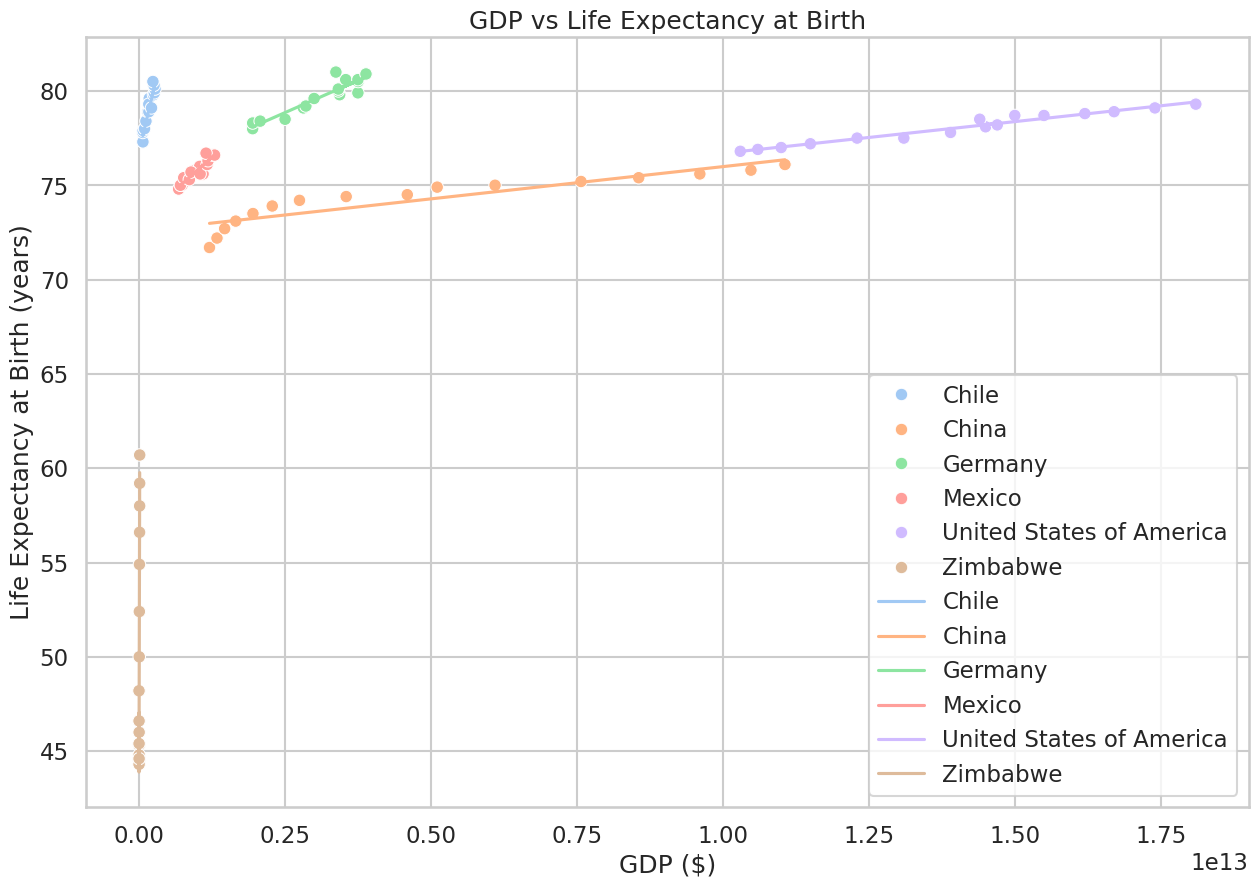

In [29]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='GDP', y='Life_expectancy', hue='Country', data=data)
for model, country in zip(models, data.Country.unique()):
    data_country = data[data.Country == country]
    plt.plot(data_country.GDP, model.predict(data_country.GDP), label=country)
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.title('GDP vs Life Expectancy at Birth')
plt.legend()
plt.show()
plt.close()